In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [6]:
file_path = 'train.csv'
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')


In [7]:
sales_series = df['sales']

In [8]:
sales_series = sales_series.head(1000) 

In [9]:
train_size = int(len(sales_series) * 0.8)
train, test = sales_series[:train_size], sales_series[train_size:]

In [14]:
order = (2, 1, 1) 
model = ARIMA(train, order=order)
fit_model = model.fit(start_params=None)

C:\Users\Agilan M A\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Agilan M A\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Agilan M A\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

C:\Users\Agilan M A\myenv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [16]:
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 9.621447066545823


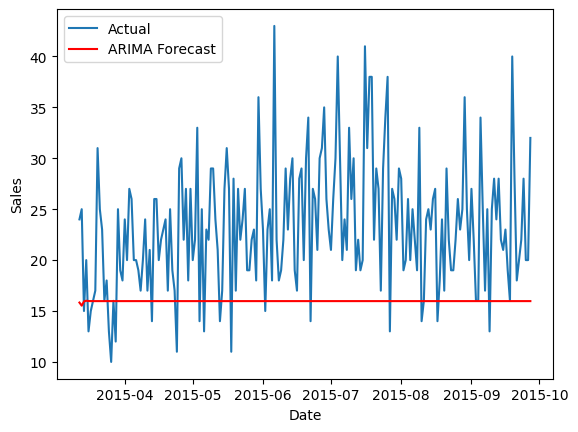

In [17]:
plt.plot(test, label='Actual')
plt.plot(predictions, label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()